In [3]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
from matplotlib.pyplot import subplots
import numpy as np
import pandas as pd

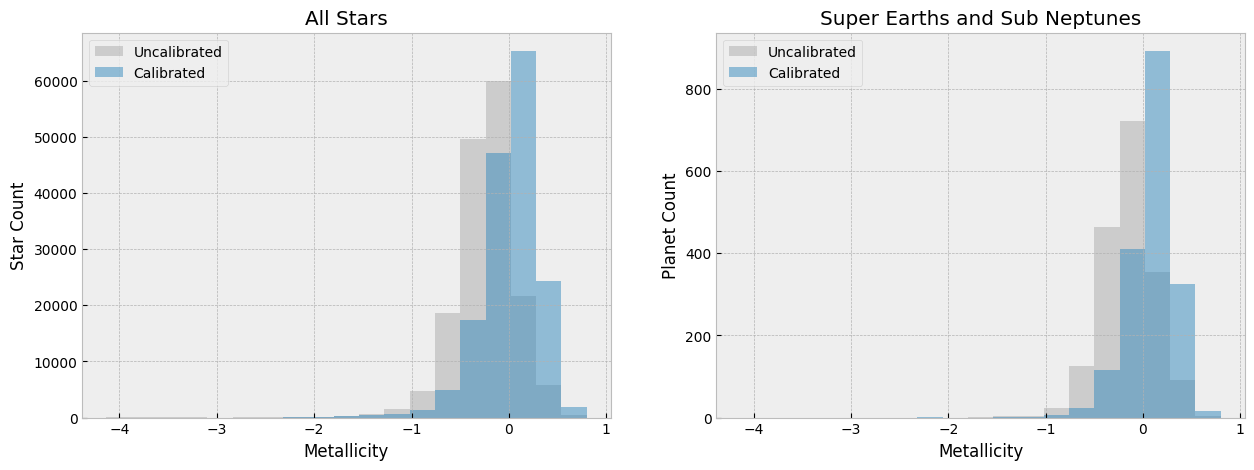

In [4]:
# Load data
all_stars = pd.read_csv('Data/calibrated_kepler_dr3_good.csv')

# Filter stars with at least one confirmed planet
dr25 = pd.read_csv('Data/kepler_dr25.csv')
planets = dr25[dr25['Exoplanet Archive Disposition'] == 'CONFIRMED']
super_earths = planets[planets['koi_prad'].between(1.2, 2.0)] # filtering to (1.2 < R < 2.0)
sub_neptunes = planets[planets['koi_prad'].between(2.0, 4.0)] # filtering to (2.0 < R < 4.0)
radius_4to8 = planets[planets['koi_prad'].between(4.0, 8.0)] # filtering to (4.0 < R < 8.0)
radius_8to16 = planets[planets['koi_prad'].between(8.0, 16.0)] # filtering to (8.0 < R < 16.0)


# Define bins for metallicity
bins = np.linspace(all_stars['mh_gspphot'].min(), all_stars['mh_gspphot'].max(), 20)

fig, axes = subplots(nrows = 1,
                     ncols = 2,
                     figsize=(15,5))

axes[0].set_ylabel('Star Count')
axes[0].set_xlabel('Metallicity')
axes[0].set_title('All Stars')
n_stars_uncal, bins_stars_uncal, patches_stars_uncal = axes[0].hist(
    all_stars['mh_gspphot'], 
    bins, 
    alpha=0.3, 
    color = 'gray', 
    label = 'Uncalibrated'
);
n_stars_cal, bins_stars_cal, patches_stars_cal = axes[0].hist(
    all_stars['calibrated_FeH'], 
    bins, 
    alpha=0.5, 
    label = 'Calibrated'
);
axes[0].legend()

axes[1].set_ylabel('Planet Count')
axes[1].set_xlabel('Metallicity')
axes[1].set_title('Super Earths and Sub Neptunes')
n_planets_uncal, bins_planets_uncal, patches_planets_uncal = axes[1].hist(
    planets['mh_gspphot'], 
    bins, 
    alpha=0.3, 
    color = 'gray', 
    label = 'Uncalibrated'
);
n_planets_cal, bins_planets_cal, patches_planets_cal = axes[1].hist(
    planets['calibrated_FeH'], 
    bins, 
    alpha=0.5, 
    label = 'Calibrated'
);   
axes[1].legend();

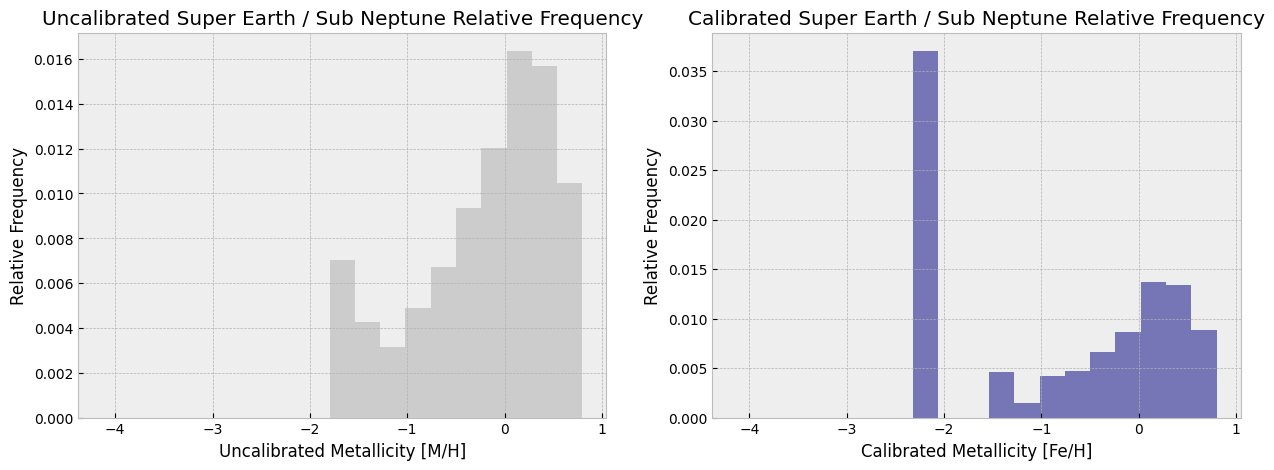

In [6]:
# plotting relative frequencies
uncalibrated_rel_freq = n_planets_uncal / n_stars_uncal
calibrated_rel_freq = n_planets_cal / n_stars_cal

fig, axes = subplots(nrows = 1, 
                     ncols = 2, 
                     figsize = (15, 5))

axes[0].set_ylabel('Relative Frequency')
axes[0].set_xlabel('Uncalibrated Metallicity [M/H]')
axes[0].set_title('Uncalibrated Super Earth / Sub Neptune Relative Frequency')
axes[0].hist(
    bins[:-1], 
    bins, 
    weights = uncalibrated_rel_freq, 
    alpha=0.3, 
    color='gray', 
);

axes[1].set_ylabel('Relative Frequency')
axes[1].set_xlabel('Calibrated Metallicity [Fe/H]')
axes[1].set_title('Calibrated Super Earth / Sub Neptune Relative Frequency')
axes[1].hist(
    bins[:-1], 
    bins, 
    weights = calibrated_rel_freq, 
    alpha=0.5, 
    color='navy', 
);

In [7]:
# plotting other possible radius ranges (just calibrated data)

super_earths = planets[planets['koi_prad'].between(1.2, 2.0)] # filtering to (1.2 < R < 2.0)

sub_neptunes = planets[planets['koi_prad'].between(2.0, 4.0)] # filtering to (2.0 < R < 4.0)

radius_4to8 = planets[planets['koi_prad'].between(4.0, 8.0)] # filtering to (4.0 < R < 8.0)

radius_8to16 = planets[planets['koi_prad'].between(8.0, 16.0)] # filtering to (8.0 < R < 16.0)

fig, axes = subplots(nrows = 2,
                     ncols = 2, 
                     sharey = True, 
                     figsize=(15,10))
fig.subplots_adjust(hspace=0.3) # creates more space between rows, prevents title and x-axis overlap
fig.suptitle('Calibrated Planet Counts')

axes[0,0].set_ylabel('Planet Count')
axes[0,0].set_xlabel('Metallicity [Fe/H]')
axes[0,0].set_title('Super Earths')
n_super_earths, bins_super_earths, patches_super_earths = axes[0,0].hist(
    super_earths['calibrated_FeH'], 
    bins, 
    alpha=0.5
);

axes[0,1].set_ylabel('Planet Count')
axes[0,1].set_xlabel('Metallicity [Fe/H]')
axes[0,1].set_title('Sub Neptunes')
n_sub_neptunes, bins_sub_neptunes, patches_sub_neptunes = axes[0,1].hist(
    sub_neptunes['calibrated_FeH'], 
    bins, 
    alpha=0.5
);

axes[1,0].set_ylabel('Planet Count')
axes[1,0].set_xlabel('Metallicity [Fe/H]')
axes[1,0].set_title('[4, 8] Earth Radii')
n_4to8, bins_4to8, patches_4to8 = axes[1,0].hist(
    radius_4to8['calibrated_FeH'], 
    bins, 
    alpha=0.5
);

axes[1,1].set_ylabel('Planet Count')
axes[1,1].set_xlabel('Metallicity [Fe/H]')
axes[1,1].set_title('[8, 16] Earth Radii')
n_8to16, bins_8to16, patches_8to16 = axes[1,1].hist(
    radius_8to16['calibrated_FeH'], 
    bins, 
    alpha=0.5
);

KeyError: 'koi_prad'

In [ ]:
# plotting relative frequencies for other possible radius ranges

super_earth_rel_freq = n_super_earths / n_stars_cal
sub_neptune_rel_freq = n_sub_neptunes / n_stars_cal
radius_4to8_rel_freq = n_4to8 / n_stars_cal
radius_8to16_rel_freq = n_8to16 / n_stars_cal

fig, axes = subplots(nrows = 2,
                     ncols = 2, 
                     sharey = True, 
                     figsize=(15,10))
fig.subplots_adjust(hspace=0.3) # creates more space between rows, prevents title and x-axis overlap
fig.suptitle('Calibrated Relative Frequencies')

axes[0,0].set_ylabel('Relative Frequency')
axes[0,0].set_xlabel('Calibrated Metallicity [Fe/H]')
axes[0,0].set_title('Super Earths')
axes[0,0].hist(
    bins[:-1], 
    bins, 
    weights = super_earth_rel_freq, 
    color = 'navy', 
    alpha=0.5
);

axes[0,1].set_ylabel('Relative Frequency')
axes[0,1].set_xlabel('Calibrated Metallicity [Fe/H]')
axes[0,1].set_title('Sub Neptunes')
axes[0,1].hist(
    bins[:-1], 
    bins, 
    weights = sub_neptune_rel_freq, 
    color = 'navy', 
    alpha=0.5
);

axes[1,0].set_ylabel('Relative Frequency')
axes[1,0].set_xlabel('Calibrated Metallicity [Fe/H]')
axes[1,0].set_title('[4, 8] Earth Radii')
axes[1,0].hist(
    bins[:-1], 
    bins, 
    weights = radius_4to8_rel_freq, 
    color = 'navy', 
    alpha=0.5
);

axes[1,1].set_ylabel('Relative Frequency')
axes[1,1].set_xlabel('Calibrated Metallicity [Fe/H]')
axes[1,1].set_title('[8, 16] Earth Radii')
axes[1,1].hist(
    bins[:-1], 
    bins, 
    weights = radius_8to16_rel_freq, 
    color = 'navy', 
    alpha=0.5
);